In [1]:
from aux_train import *
from aux_plot import *
import API_Numpy

float_pres = 'float64' # Definindo a precisão padrão para as análises

In [3]:
3*8*(4**3)

1536

In [2]:
Δx=2/128
CFL=0.5
Total_time=25
Δt=0.1/Total_time
n=50

fronteira=FronteiraPeriodica

import time as t

initial_time=t.time()
count=0
total=3*8*(4**3)
for equation_name,equation in zip(['diff_equation','transp_equation','burgers_equation'],[diff_equation,transp_equation,burgers_equation]):
        for poly_grade in range(8):
                for seno_ampli in range(4):
                        for gauss_var in range(4):
                                for seizures in range(4):
                                        if poly_grade+seno_ampli+gauss_var>1:
                                                seed=np.random.seed()
                                                np.random.seed(seed=seed)
                                                y,dy,y_t=create_dataset(
                                                        n=n,
                                                        poly_grade=poly_grade,
                                                        seno_ampli=seno_ampli,
                                                        gauss_var=gauss_var,
                                                        Δx=Δx,
                                                        Δt=Δt,
                                                        Total_time=Total_time,
                                                        granul_ref=4,
                                                        seizures=seizures,
                                                        fronteira=fronteira,
                                                        equation=equation)

                                                save_dataset(f'datasets/equation={equation_name} polys grau={poly_grade} seno_ampli={seno_ampli} gauss_var={gauss_var} seizure={seizures}',y_t,dy,y,Δx,Δt,CFL,fronteira,equation,seed)

                                                count+=1
                                                spent_time=t.time()-initial_time
                                                p_finished=count/total

                                                prev_time=(1-p_finished)*spent_time/p_finished

                                                show_hour=int(prev_time//3600)
                                                
                                                show_days=int(show_hour//24)
                                                show_hour=int(show_hour%24)
                                                
                                                prev_time=prev_time%3600

                                                show_min=int(prev_time//60)
                                                prev_time=round(prev_time%60)

                                                print(f'{str(np.round(p_finished*100,2)).zfill(5)}% - ETA:{show_days}:{show_hour}:{str(show_min).zfill(2)}:{str(prev_time).zfill(2)}               ',end='\r')

In [2]:
equation_name='transp_equation'
poly_grade=7
seno_ampli=3
gauss_var=3
seizures=3

data_temporal,data_spatial,data_base,Δx,Δt,CFL,fronteira,equation=load_dataset(f'datasets/equation={equation_name} polys grau={poly_grade} seno_ampli={seno_ampli} gauss_var={gauss_var} seizure={seizures}')


'Δx': 0.015625
'Δt': 0.004
'CFL': 0.5
'fronteira': <function FronteiraPeriodica at 0x0000015D86B7F550>
'equation': <class 'aux_equation.transp_equation'>
'seed': None



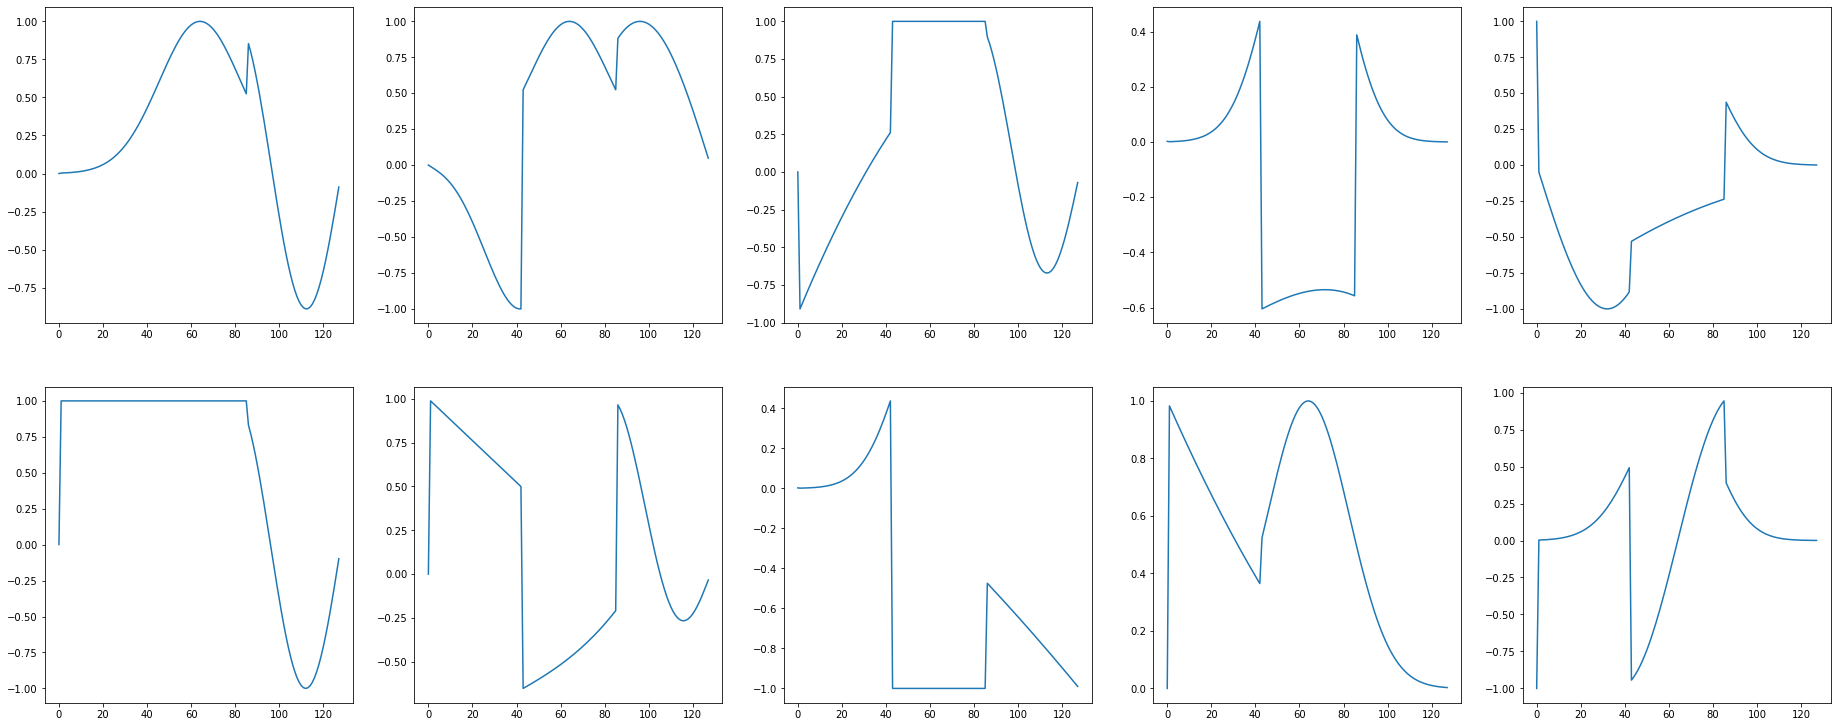

In [4]:
plt.figure(figsize=(6.4*5,6.4*2))
index=np.floor(np.random.uniform(size=[10],low=0,high=data_temporal.shape[0])).astype('int32')
for i,j in zip(range(10),index):
    plt.subplot(2, 5, i+1)
    plt.plot(data_temporal[j,0])
plt.savefig('Exemplo dataset 7-3-3-3.png')

[   1  320  640  960 1279]


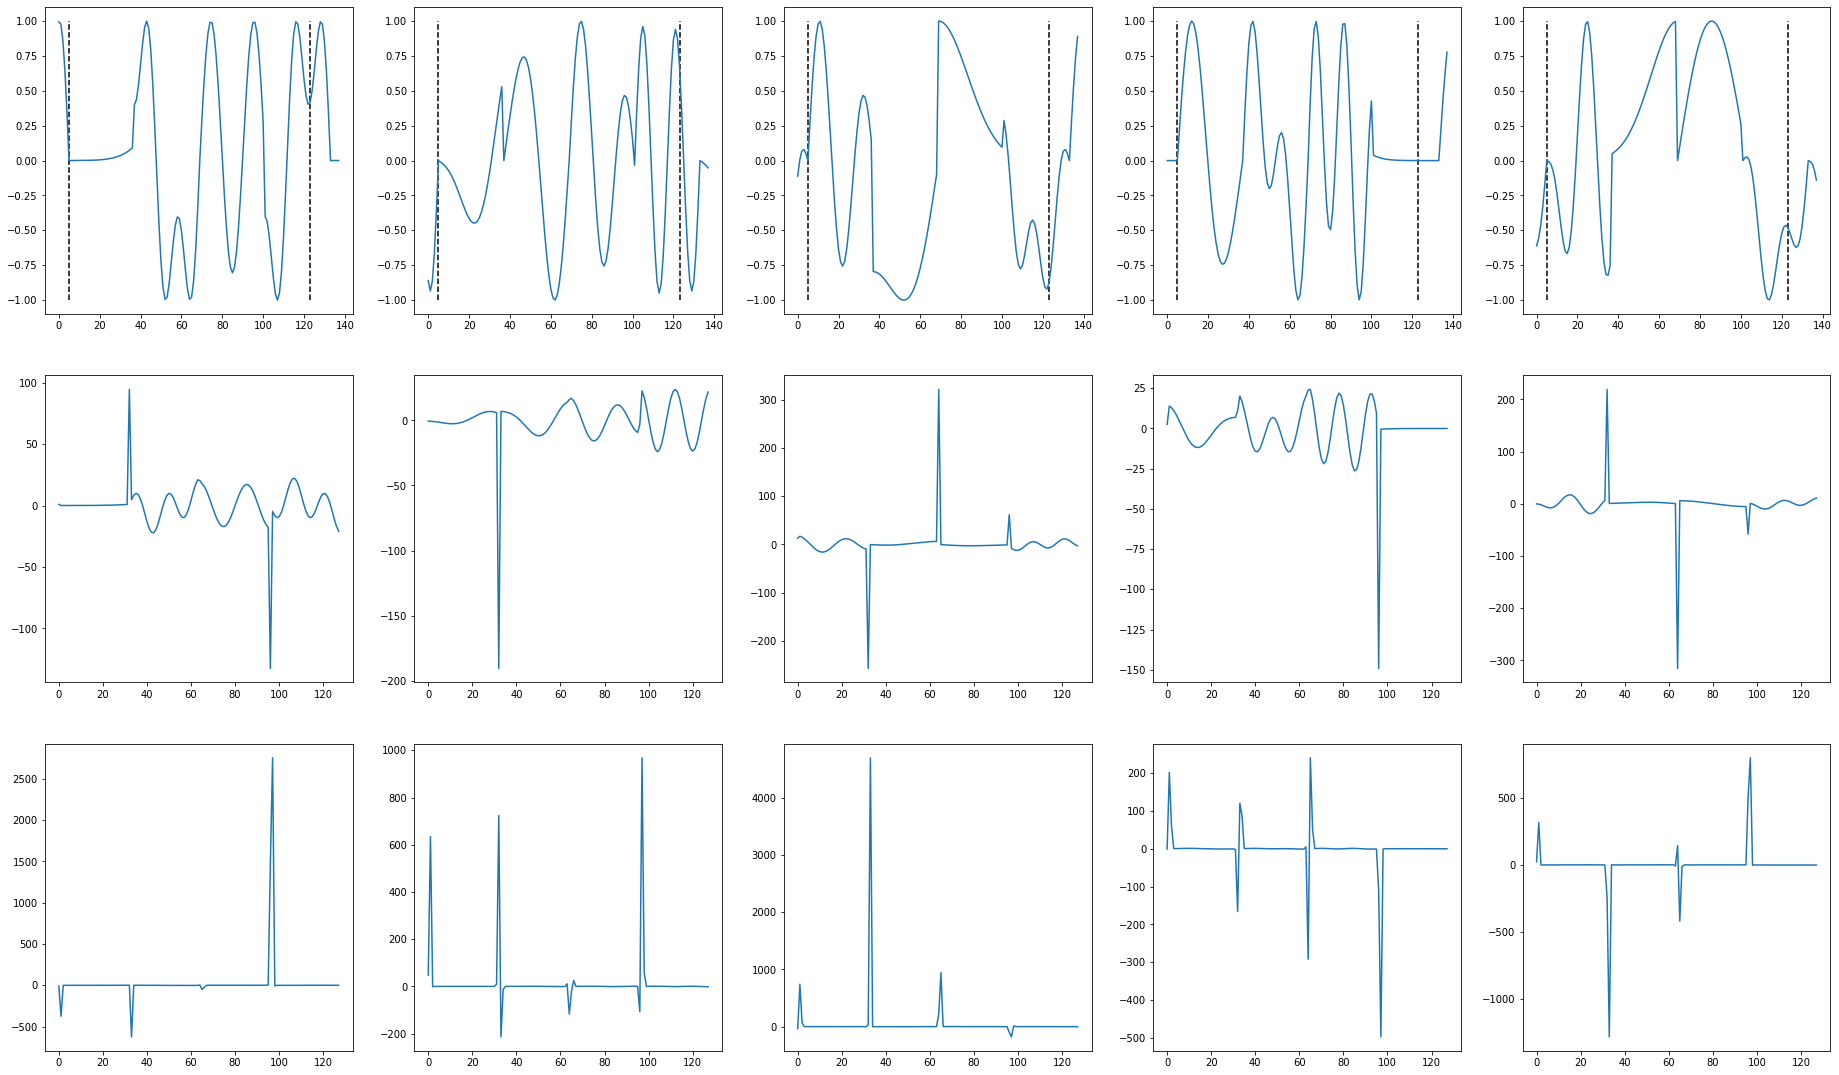

In [6]:
seed=np.random.seed()
np.random.seed(seed=seed)
n=50


poly_grade=False
seno_ampli=10
gauss_var=10
seizures=0

fronteira=FronteiraPeriodica
equation=diff_equation

y,dy,y_t=create_dataset(
        n=50,
        poly_grade=poly_grade,
        seno_ampli=seno_ampli,
        gauss_var=gauss_var,
        Δx=Δx,
        Δt=Δt,
        Total_time=10,
        granul_ref=10,
        seizures=4,
        fronteira=fronteira,
        equation=equation)

index=np.floor(np.random.uniform(size=[5],low=0,high=n)).astype('int32')

k=5

plt.figure(figsize=(6.4*5,6.4*3))
for i,j in zip(range(5),index):
    plt.subplot(3, 5, i+1)
    plt.plot(fronteira(y[j],API_Numpy,k))
    plt.vlines(
                x          = k,
                color      = 'black',
                ymax=1,
                ymin=-1,
                linestyles = '--'
            )
    plt.vlines(
                x          = y.shape[-1]-k,
                ymax=1,
                ymin=-1,
                color      = 'black',
                linestyles = '--'
            )
    plt.subplot(3, 5, i+6)
    plt.plot(dy[j])
    plt.subplot(3, 5, i+11)
    plt.plot(y_t[j,-1])

save_dataset(f'datasets/polys grau={poly_grade} seizure={seizures}',y_t,dy,y,Δx,Δt,CFL,fronteira,equation,seed)

In [5]:
y.shape

(50, 129)